In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np

2024-12-29 15:27:23.123540: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-29 15:27:28.394273: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-29 15:27:31.131572: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735466254.324429    4537 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735466254.828252    4537 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-29 15:27:40.604456: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Load Dataset (CIFAR-10)

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
print(f"Dataset shapes: X_train={X_train.shape}, y_train={y_train.shape}")
print(datasets.cifar10)


Dataset shapes: X_train=(50000, 32, 32, 3), y_train=(50000, 1)
<module 'keras.api.datasets.cifar10' from '/home/abishek/.local/lib/python3.10/site-packages/keras/api/datasets/cifar10/__init__.py'>


Normalize the data

In [4]:
X_train, X_test = X_train / 255.0, X_test / 255.0

One-Hot Encode Labels

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

Create a Sequential Model

In [6]:
model = models.Sequential()

Add Convolutional Layers

In [7]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/home/abishek/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-29 15:32:25.679286: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2024-12-29 15:32:25.679473: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: abishek-HP-Pavilion-17-Notebook-PC
2024-12-29 15:32:25.679524: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: abishek-HP-Pavilion-17-Notebook-PC
2024-12-29 15:32:25.679877: I external/local_xla/xla/stre

Add Fully Connected Layers

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Compile the Model

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the Model

In [10]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5


2024-12-29 15:32:33.067205: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 88ms/step - accuracy: 0.4318 - loss: 1.5783 - val_accuracy: 0.6067 - val_loss: 1.1132
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.6488 - loss: 1.0114 - val_accuracy: 0.6722 - val_loss: 0.9402
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 62ms/step - accuracy: 0.7158 - loss: 0.8149 - val_accuracy: 0.6754 - val_loss: 0.9498
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.7681 - loss: 0.6657 - val_accuracy: 0.6957 - val_loss: 0.8947
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.8150 - loss: 0.5290 - val_accuracy: 0.6943 - val_loss: 0.9650


Evaluate the Model

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6942 - loss: 0.9590
Test Loss: 0.9650392532348633, Test Accuracy: 0.6942999958992004


Save the Model

In [12]:
model.save("cifar10_model.h5")

Load the Model

In [13]:
loaded_model = tf.keras.models.load_model("cifar10_model.h5")

Predict with the Model

In [14]:
sample_images = X_test[:5]
predictions = loaded_model.predict(sample_images)
print(f"Predictions: {np.argmax(predictions, axis=1)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predictions: [3 8 0 0 4]


Visualize Sample Predictions

In [15]:
import matplotlib.pyplot as plt
labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

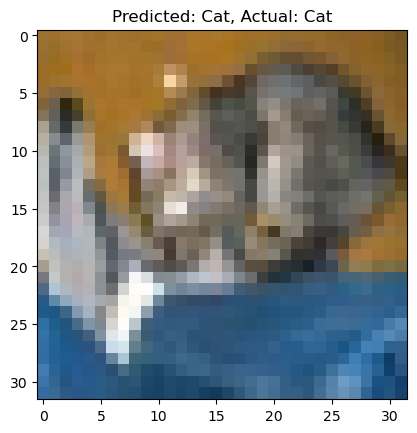

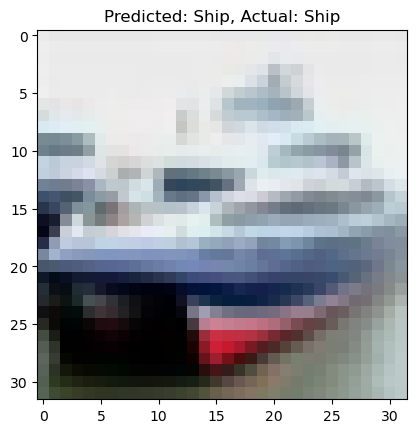

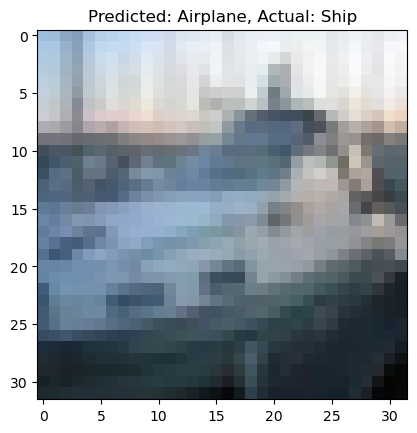

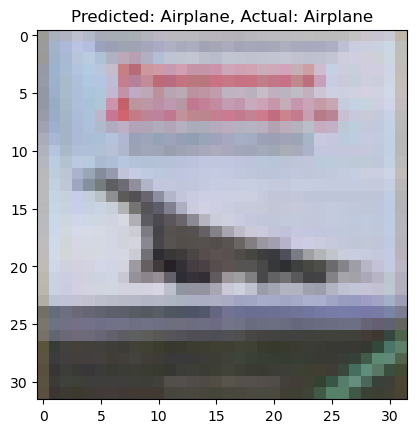

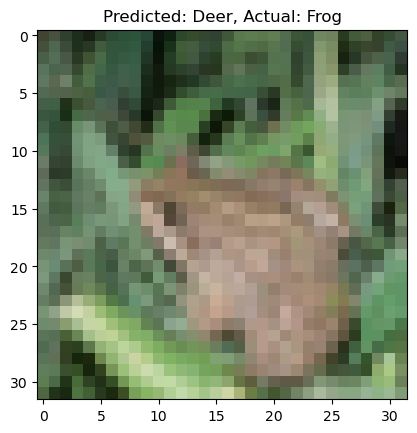

In [16]:
for i in range(5):
    plt.imshow(sample_images[i])
    plt.title(f"Predicted: {labels[np.argmax(predictions[i])]}, Actual: {labels[np.argmax(y_test[i])]}")
    plt.show()

Model Summary

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,215,776 (16.08 MB)

 Trainable params: 1,405,258 (5.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,810,518 (10.72 MB)

Visualize Training History

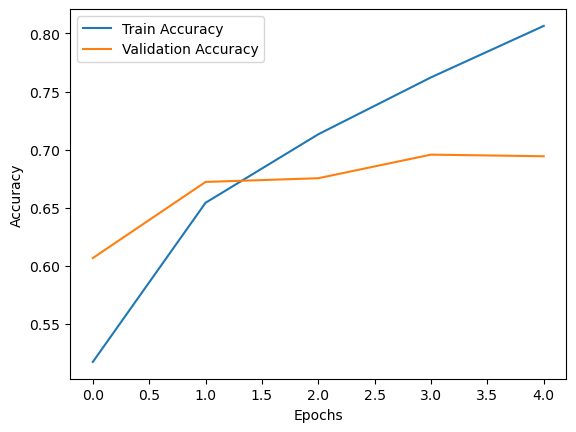

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()